In [3]:
from tqdm import tqdm
# import pickle
import json

import pandas as pd
import numpy as np

import torch

from matplotlib import pyplot as plt

from data import JPXdataModule

from utils import spread_return_sharpe_from_weights

np.set_printoptions(threshold=2000, linewidth=140, precision=5, edgeitems=20, suppress=1)
pd.set_option('display.max_rows', 200)

with open('./settings.json') as f:
    settings = json.load(f)

# window = 60

In [4]:
tensor_sto = torch.load(settings['CACHE_DIR'] + 'data_stocks.pt').cpu().numpy()
is_active = tensor_sto[:,:,-1]

In [63]:
last_updates = torch.load(settings['CACHE_DIR'] + 'last_updates.pt').cpu().squeeze().numpy()
np.min(last_updates,axis=(0,1)), np.max(last_updates,axis=(0,1))

(array([ 0.00000e+00, -7.28507e+00, -4.80747e+00, -5.01187e+00, -5.42525e+00, -9.57394e+00, -9.41295e+00, -1.89198e+01, -8.44056e+01,
        -7.75521e+00, -6.29201e+00, -1.57468e+01, -1.52817e+02, -1.11572e+01, -1.13888e+01, -1.74662e+01,  0.00000e+00, -1.24063e+01,
        -1.20822e+01, -2.24570e+01,  0.00000e+00, -1.29668e+01, -9.67947e+00, -1.35148e+01, -3.25000e-01,  1.41829e+08,  0.00000e+00,
         0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00], dtype=float32),
 array([9.08863e+01, 1.36295e+00, 2.35574e+00, 1.07992e+01, 9.68294e+01, 8.04755e+00, 5.57493e+00, 7.28298e+00, 1.07264e+02, 1.13108e+01,
        1.15770e+01, 1.01369e+01, 5.84087e+02, 5.56617e+01, 5.75108e+01, 1.11529e+01, 5.88186e+02, 5.59851e+01, 5.78612e+01, 8.92168e+00,
        6.01991e+02, 4.82177e+01, 4.76332e+01, 8.96302e+00, 9.92000e-01, 1.69041e+14, 4.59000e+02, 1.46900e+03, 7.24000e+02, 2.00000e+00,
        1.00000e+00, 1.00000e+00, 4.00000e+00], dtype=float32))

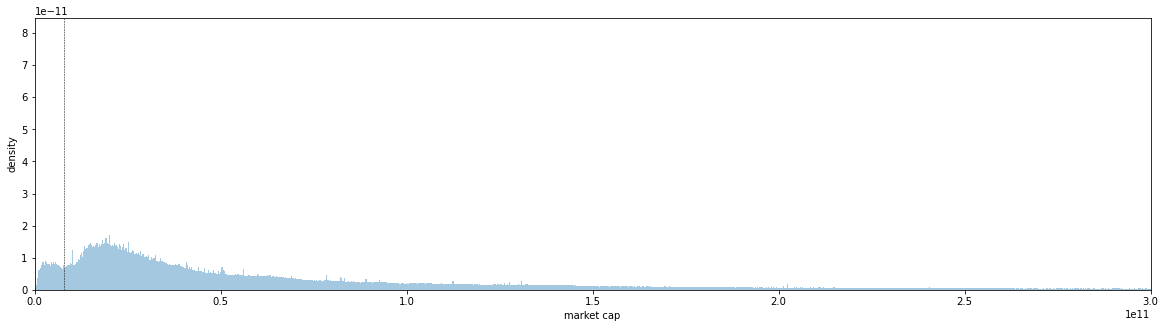

In [72]:
fig, ax = plt.subplots(figsize=(20, 5))

ax.set_xlabel("market cap")
ax.set_ylabel("density")

plt.hist(last_updates[:,:,-8].flatten().clip(0,3e12), bins=10000, density=True, alpha=0.4)
plt.xlim(0,0.3e12)
plt.axvline(0.8e10, color='black', linestyle='--',linewidth=0.5)

plt.show()

In [75]:
data_finances = torch.load(settings['CACHE_DIR'] + 'data_finances.pt').cpu().squeeze().numpy()
np.min(data_finances,axis=(0,1)), np.max(data_finances,axis=(0,1))

(array([-582.9235 ,  -55.47567,  -57.31914,  -23.66023, -582.9235 ,  -55.47567,  -57.31915,  -23.66023, -594.83405,  -47.64448,  -47.06697,
         -10.19373, -582.3929 ,  -55.45851,  -57.31882,  -11.09387,   -0.325  ,    0.     ,    0.     ,    0.     ,    0.     ,    0.     ,
           0.     ,    0.     ,    0.     ], dtype=float32),
 array([ 581.1904 ,   55.26701,   57.1416 ,   26.65178,  581.1904 ,   55.26701,   57.14159,   26.65178,  595.2311 ,   47.57554,   46.98432,
          13.49891,  203.57613,   14.41549,   14.20645,   25.66015,    0.992  ,  459.     , 1469.     ,  724.     ,    2.     ,    1.     ,
           1.     ,    1.     ,    4.     ], dtype=float32))

In [77]:
data_finances[111,33]

array([ 0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.79322, -0.0247 , -0.02441,  0.41553,  0.75482,
       -0.06039, -0.05517,  0.38668,  0.64   , 35.     , 35.     , 35.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ],
      dtype=float32)

In [36]:
tensor_ret = torch.load(settings['CACHE_DIR'] + 'data_returns.pt').cpu().numpy()
np.min(tensor_ret,axis=(0,1)), np.max(tensor_ret,axis=(0,1))

(array([-2.00000e-01, -2.00000e-01, -2.00000e-01, -2.00000e-01, -1.24609e-01, -1.24609e-01, -1.24609e-01, -2.00000e-01, -4.95405e-02,
        -4.95405e-02,  0.00000e+00, -3.40282e+38, -3.40282e+38, -3.40282e+38, -3.40282e+38, -1.00000e+00, -1.00000e+00, -1.00000e+00,
        -1.00000e+00, -1.00000e+00, -1.00000e+00, -1.00000e+00, -1.00000e+00, -5.31155e+02, -2.81266e+03, -2.87655e+05, -2.37738e+05,
        -5.00000e-01, -5.00000e-01, -5.00000e-01, -5.00000e-01, -1.00000e+00, -1.00000e+00, -1.00000e+00, -1.00000e+00, -5.00000e-01,
        -5.00000e-01, -5.00000e-01, -5.00000e-01, -5.00000e-01, -5.00000e-01, -5.00000e-01, -5.00000e-01], dtype=float32),
 array([2.00000e-01, 2.00000e-01, 2.00000e-01, 2.00000e-01, 1.38340e-01, 1.38340e-01, 1.38340e-01, 2.00000e-01, 2.00000e-01, 2.00000e-01,
        2.00000e-01, 3.40282e+38, 3.40282e+38, 3.40282e+38, 3.40282e+38, 8.39000e+02, 8.39000e+02, 8.39000e+02, 8.39000e+02, 4.00000e+00,
        7.60870e+00, 7.68844e+00, 5.06667e+00, 7.70538e+02, 7.802

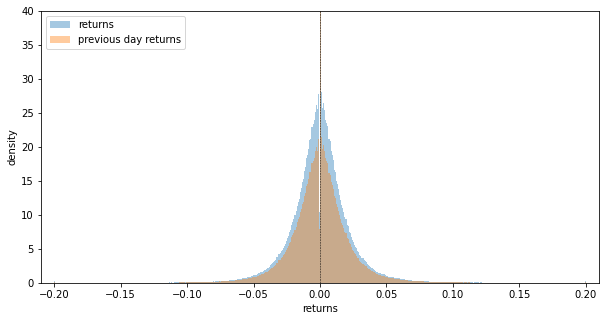

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("returns")
ax.set_ylabel("density")

plt.hist(tensor_ret[:,:,0][is_active==1].flatten(), bins=500, density=True, label='returns', alpha=0.4)
plt.xlim(-0.21,0.21)
plt.ylim(0,40)
plt.axvline(0, color='black', linestyle='--',linewidth=0.5)

plt.hist(tensor_ret[:,:,1][is_active==1].flatten(), bins=500, density=True, label='previous day returns', alpha=0.4)
plt.xlim(-0.21,0.21)
plt.ylim(0,40)

plt.legend(loc="upper left")

plt.show()

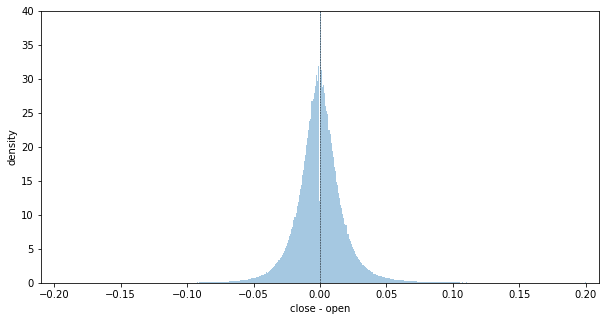

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("close - open")
ax.set_ylabel("density")

plt.hist(tensor_ret[:,:,2][is_active==1].flatten(), bins=500, density=True, alpha=0.4)
plt.xlim(-0.21,0.21)
plt.ylim(0,40)
plt.axvline(0, color='black', linestyle='--',linewidth=0.5)

plt.show()

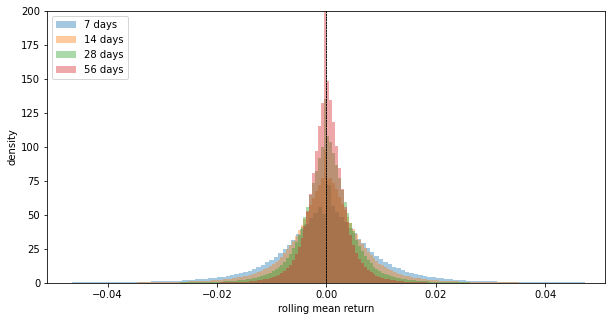

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("rolling mean return")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_ret[:,:,3+f][is_active==1].flatten(), bins=500, density=True, alpha=0.4, label=label)
    plt.xlim(-0.051,0.051)
    plt.ylim(0,200)
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper left")

plt.show()

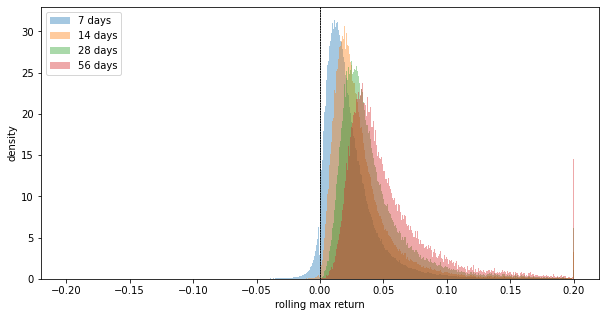

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("rolling max return")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_ret[:,:,3+4+f][is_active==1].flatten(), bins=500, density=True, alpha=0.4, label=label)
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper left")

plt.show()

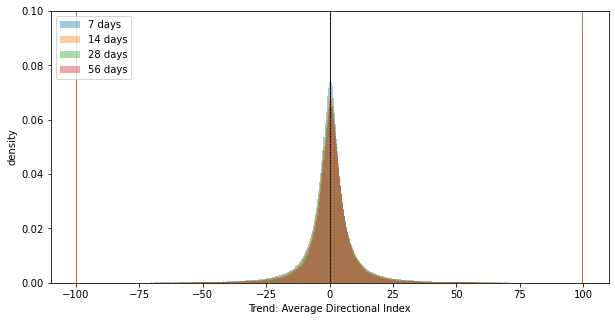

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("Trend: Average Directional Index")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_ret[:,:,3+8+f][is_active==1].flatten(), bins=500, density=True, alpha=0.4, label=label)
    plt.ylim(0,0.10)
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper left")

plt.show()

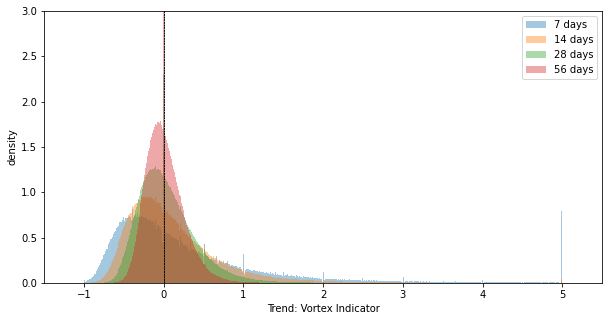

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("Trend: Vortex Indicator")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_ret[:,:,3+12+f][is_active==1].flatten(), bins=500, density=True, alpha=0.4, label=label)
    plt.xlim(-1.5,5.5)
    plt.ylim(0,3)
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper right")

plt.show()

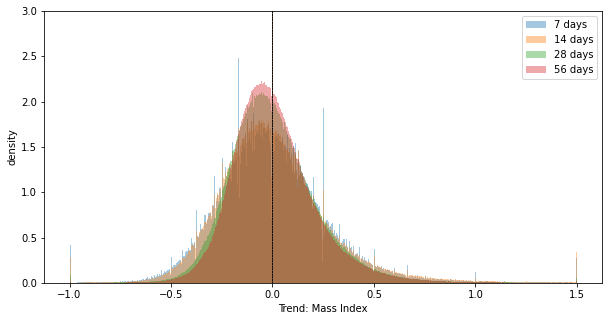

In [59]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("Trend: Mass Index")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_ret[:,:,3+16+f][is_active==1].flatten(), bins=500, density=True, alpha=0.4, label=label)
    plt.ylim(0,3)
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper right")

plt.show()

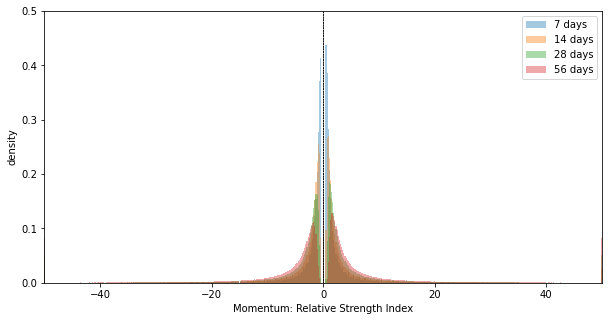

In [64]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("Momentum: Relative Strength Index")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_ret[:,:,3+20+f][is_active==1].flatten(), bins=500, density=True, alpha=0.4, label=label)
    plt.xlim(-50,50)
    plt.ylim(0,0.5)
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper left")

plt.show()

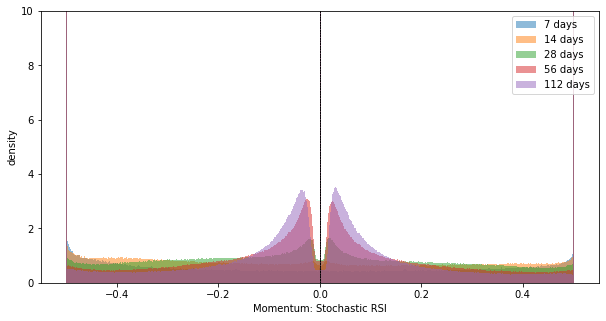

In [128]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("Momentum: Stochastic RSI")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_ret[:,:,3+24+f][is_active==1].flatten(), bins=500, density=True, alpha=0.4, label=label)
    plt.ylim(0,10)  #TODO: ver sin
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper left")

plt.show()

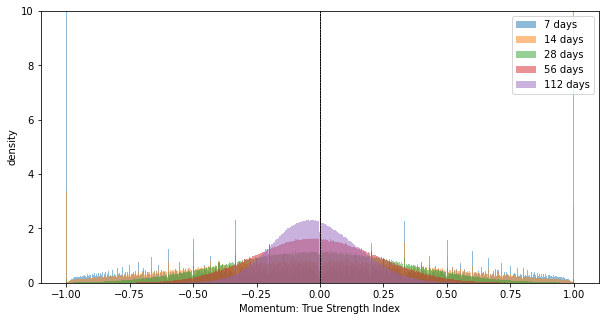

In [130]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("Momentum: True Strength Index")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_ret[:,:,3+28+f][is_active==1].flatten(), bins=500, density=True, alpha=0.4, label=label)
    plt.ylim(0,10)  #TODO: ver sin
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper left")

plt.show()

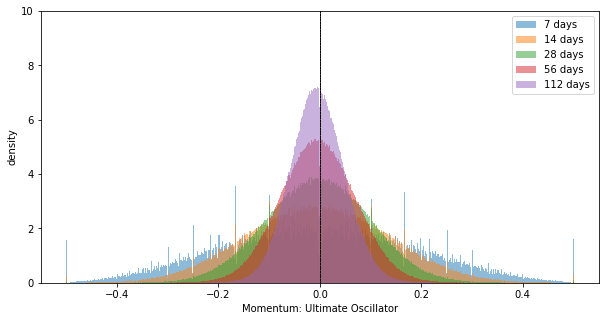

In [132]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("Momentum: Ultimate Oscillator")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_ret[:,:,3+32+f][is_active==1].flatten(), bins=500, density=True, alpha=0.4, label=label)
    plt.ylim(0,10)
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper left")

plt.show()

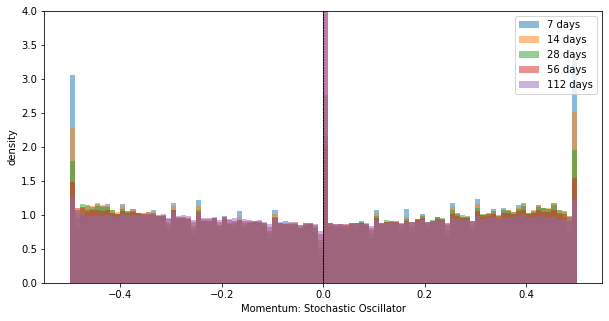

In [136]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("Momentum: Stochastic Oscillator")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_ret[:,:,3+36+f][is_active==1].flatten(), bins=100, density=True, alpha=0.4, label=label)
    plt.ylim(0,4)
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper left")

plt.show()

In [5]:
tensor_vol = torch.load(settings['CACHE_DIR'] + 'data_volatility.pt').cpu().numpy()

In [7]:
np.min(tensor_vol,axis=(0,1)), np.max(tensor_vol,axis=(0,1))

(array([-1.46478e-01, -6.32077e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00, -3.40282e+38, -3.40282e+38,
        -3.40282e+38, -6.80565e+37, -1.26333e+02, -9.11999e+01, -3.49437e+01, -2.32450e+01, -2.00031e+00, -3.00001e+00, -4.33543e+00,
        -6.03065e+00, -5.28395e-01, -6.54713e-01, -7.03866e-01, -7.23317e-01,  0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
        -5.00000e-01, -5.00000e-01, -5.00000e-01, -5.00000e-01, -8.39680e+07, -3.18561e+06, -8.03398e+05, -3.20790e+06, -2.29376e+08,
        -1.94432e+08, -3.09159e+08, -3.93762e+08, -2.62150e+07, -1.96608e+07, -1.03881e+06, -1.70240e+07], dtype=float32),
 array([1.76620e-01, 7.70860e+00, 6.15385e-01, 2.00000e-01, 1.69596e-01, 1.58362e-01, 1.58362e-01, 3.40282e+38, 3.40282e+38, 3.40282e+38,
        3.40282e+38, 9.17999e+01, 2.71250e+02, 3.15590e+01, 3.22485e+01, 2.00012e+00, 3.00001e+00, 4.31909e+00, 5.93988e+00, 4.92958e-01,
        5.35807e-01, 7.03303e-01, 7.57125e-01, 5.93829e+01, 6.772

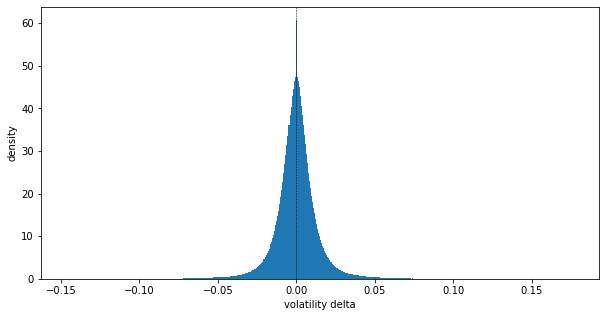

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("volatility delta")
ax.set_ylabel("density")

plt.hist(tensor_vol[:,:,0][is_active==1].flatten(), bins=500, density=True)
plt.axvline(0, color='black', linestyle='--',linewidth=0.5)

plt.show()

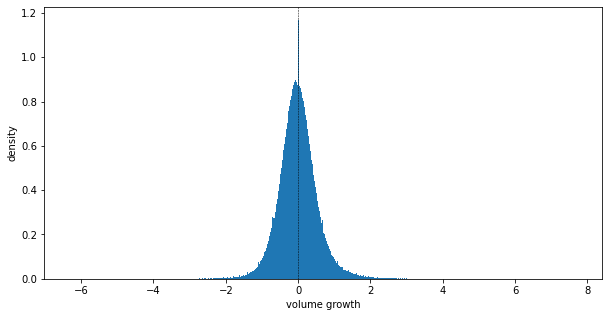

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("volume growth")
ax.set_ylabel("density")

plt.hist(tensor_vol[:,:,1][is_active==1].flatten(), bins=500, density=True)
plt.axvline(0, color='black', linestyle='--',linewidth=0.5)

plt.show()

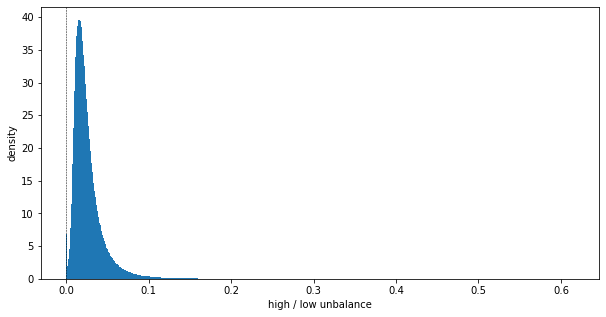

In [140]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("intraday high / low unbalance")
ax.set_ylabel("density")

plt.hist(tensor_vol[:,:,2][is_active==1].flatten(), bins=500, density=True)
plt.axvline(0, color='black', linestyle='--',linewidth=0.5)

plt.show()

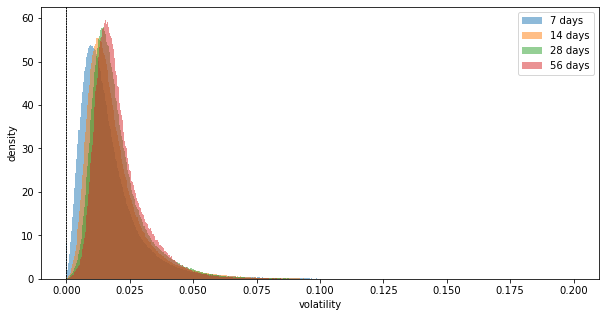

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("volatility")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_vol[:,:,3+f][is_active==1].flatten(), bins=500, density=True, alpha=0.5, label=label)
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper right")

plt.show()

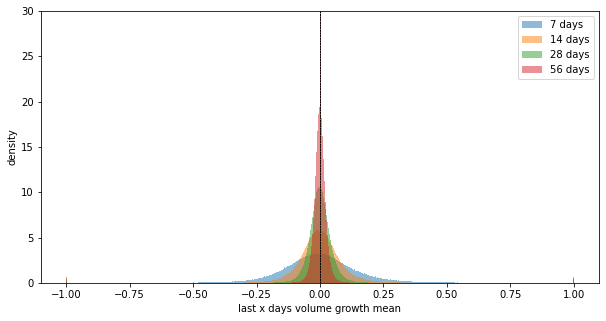

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("last x days volume growth mean")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_vol[:,:,3+4+f][is_active==1].flatten().clip(-1,1), bins=500, density=True, alpha=0.5, label=label)
    plt.ylim(0,30)
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper right")

plt.show()

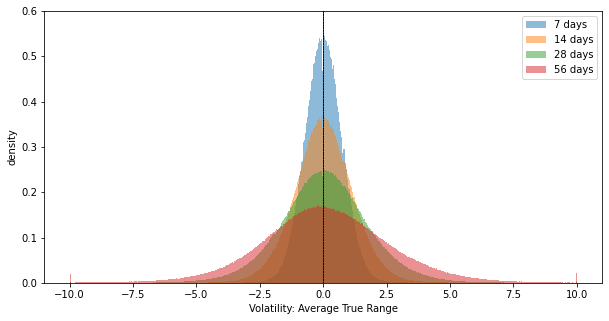

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("Volatility: Average True Range Deviation")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_vol[:,:,3+8+f][is_active==1].flatten().clip(-10,10), bins=500, density=True, alpha=0.5, label=label)
    plt.ylim(0,0.6)
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper right")

plt.show()

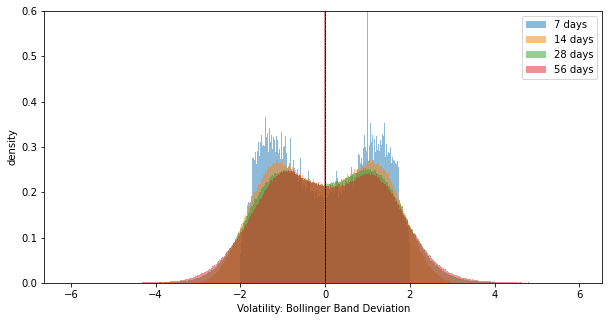

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("Volatility: Bollinger Band Deviation")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_vol[:,:,3+12+f][is_active==1].flatten(), bins=500, density=True, alpha=0.5, label=label)
    plt.ylim(0,0.6)
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper right")

plt.show()

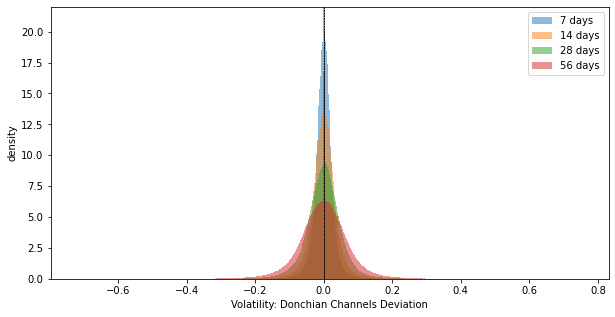

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("Volatility: Donchian Channels Deviation")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_vol[:,:,3+16+f][is_active==1].flatten(), bins=500, density=True, alpha=0.5, label=label)
    plt.ylim(0,22)
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper right")

plt.show()

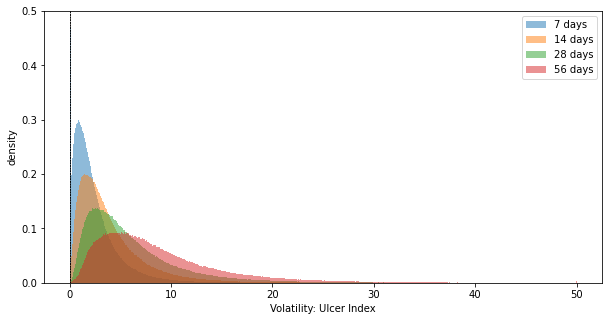

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("Volatility: Ulcer Index")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_vol[:,:,3+20+f][is_active==1].flatten(), bins=500, density=True, alpha=0.5, label=label)
    plt.ylim(0,0.5)
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper right")

plt.show()

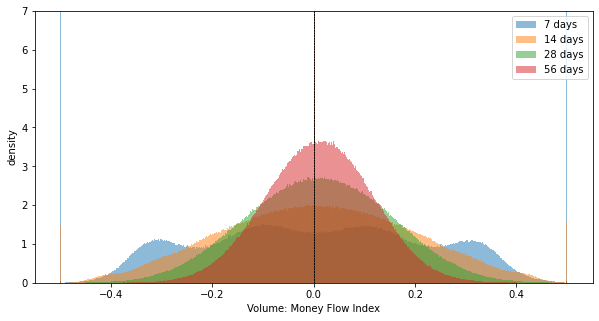

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("Volume: Money Flow Index")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_vol[:,:,3+24+f][is_active==1].flatten(), bins=500, density=True, alpha=0.5, label=label)
    plt.ylim(0,7)
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper right")

plt.show()

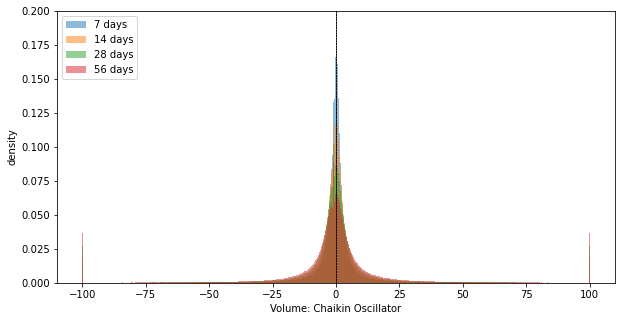

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("Volume: Chaikin Oscillator")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_vol[:,:,3+28+f][is_active==1].flatten(), bins=500, density=True, alpha=0.5, label=label)
    plt.ylim(0,0.2)
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper left")

plt.show()

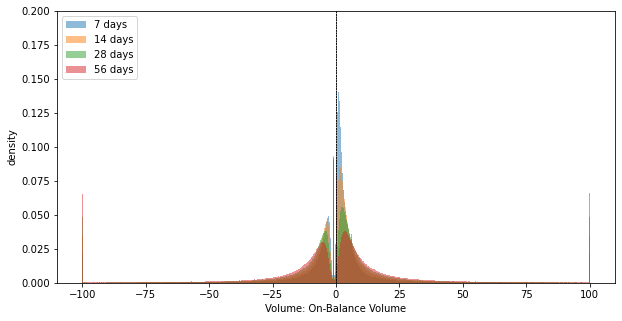

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("Volume: On-Balance Volume")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_vol[:,:,3+32+f][is_active==1].flatten(), bins=500, density=True, alpha=0.5, label=label)
    plt.ylim(0,0.2)
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper left")

plt.show()

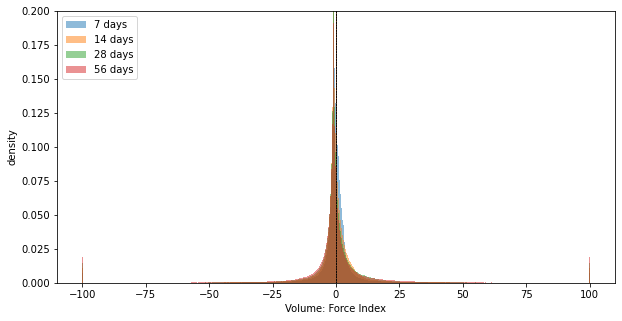

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("Volume: Force Index")
ax.set_ylabel("density")

for f in range(4):
    label = '{} days'.format(7 * 2**f)
    plt.hist(tensor_vol[:,:,3+36+f][is_active==1].flatten(), bins=500, density=True, alpha=0.5, label=label)
    plt.ylim(0,0.2)
    plt.axvline(0, color='black', linestyle='--',linewidth=0.5)
    plt.legend(loc="upper left")

plt.show()

In [ ]:
tensor_fin = torch.load(settings['CACHE_DIR'] + 'data_finances.pt').cpu().numpy()
tensor_fin.shape, np.min(tensor_fin,axis=(0,1)), np.max(tensor_fin,axis=(0,1)), np.median(np.abs(tensor_fin),axis=(0,1))

# eq_to_asset, fi_channels, forecasts_ann, forecasts_diff, day_counts, day_counts_exp, is_update, update_types, is_year_update, profit_type

#-10, 10
# -5, 5

fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel("returns")
ax.set_ylabel("density")

plt.hist(tensor_fin[:,:,-8][is_active==1].flatten(), bins=5000, density=True)
plt.xlim(-100,1e12)
# plt.ylim(0,0.5)
plt.axvline(0, color='black', linestyle='--',linewidth=0.5)

plt.show()

sec_id = 0

fig, ax1 = plt.subplots(figsize=(20, 4))
ax1.set_xlabel("time")
ax1.set_ylabel('profit')
ax1.plot(tensor_fin[:,sec_id,7], color='steelblue', label='profit')

ax1.set_xlabel("time")
ax1.set_ylabel('profit')
ax1.plot(tensor_fin[:,sec_id,11], color='orange', label='forecast')

ax1.set_xlabel("time")
ax1.set_ylabel('profit')
ax1.plot(tensor_fin[:,sec_id,-3]/10, color='green', alpha=0.2, label='quarter', linestyle='--')
ax1.legend(loc="upper left")


In [3]:
financials_csv = pd.read_csv(settings['DATA_DIR'] + 'financials.csv')

C:\Users\codef\AppData\Local\Temp\ipykernel_5688\4029013447.py:1: DtypeWarning: Columns (14,15,16,17,18,19,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  financials_csv = pd.read_csv(settings['DATA_DIR'] + 'financials.csv')


In [9]:
financials_csv.TypeOfDocument.value_counts()

ForecastRevision                                     16995
FYFinancialStatements_Consolidated_JP                14780
3QFinancialStatements_Consolidated_JP                14728
1QFinancialStatements_Consolidated_JP                14718
2QFinancialStatements_Consolidated_JP                14624
NumericalCorrection                                   2551
FYFinancialStatements_NonConsolidated_JP              2458
3QFinancialStatements_NonConsolidated_JP              2411
1QFinancialStatements_NonConsolidated_JP              2405
2QFinancialStatements_NonConsolidated_JP              2366
2QFinancialStatements_Consolidated_IFRS                962
1QFinancialStatements_Consolidated_IFRS                960
FYFinancialStatements_Consolidated_IFRS                897
3QFinancialStatements_Consolidated_IFRS                881
FYFinancialStatements_REIT                             571
ForecastRevision_REIT                                  320
FYFinancialStatements_Consolidated_US                   

In [2]:
data = JPXdataModule()

loading D:/jpx_cache/stock_prices_tensor.pkl...
train len: 961
val len: 241


In [33]:
sr, bm, bs = [], [], []

print('val dataset evaluation...')
for i in tqdm(range(len(data.all_ds) - window)):

    targets = data.all_ds.y[i:i+window]
    weights = torch.empty(targets.shape);  weights[:] = 1/2000
    # weights = torch.normal(mean=torch.zeros(targets.shape), std=1/2000)

    sharpe, buf_mean, buf_std = spread_return_sharpe_from_weights(targets, weights)

    sr.append(sharpe)
    bm.append(buf_mean)
    bs.append(buf_std)

naive = np.vstack((np.stack(sr),np.stack(bm),np.stack(bs))).T

val dataset evaluation...


100%|██████████| 1142/1142 [01:53<00:00, 10.04it/s]


In [3]:
model = JpxMultiTask.load_from_checkpoint('./weights/version_0/jpx_EVAL.ckpt',in_channels=data.train_ds.x.shape[1])
model.eval()
model.cuda()

sr, bm, bs = [], [], []

print('val dataset evaluation...')
for i in tqdm(range(len(data.all_ds) - window)):

    weights = model(data.all_ds.x[i:i+window])
    targets = data.all_ds.y[i:i+window]

    sharpe, buf_mean, buf_std = spread_return_sharpe_from_weights(targets, weights)

    sr.append(sharpe)
    bm.append(buf_mean)
    bs.append(buf_std)

mystrat = np.vstack((np.stack(sr),np.stack(bm),np.stack(bs))).T

val dataset evaluation...


100%|██████████| 1142/1142 [02:36<00:00,  7.30it/s]


In [5]:
targets_day_means = torch.mean(torch.nan_to_num(data.all_ds.y).squeeze(),dim=1).detach().cpu().numpy()[window:]

# targets_day_means = []

# for day, group in data.stock_prices_csv_ext.groupby('Date'):
#     targets_day_means.append(group.Target.mean())

# targets_day_means = np.array(targets_day_means)[window:]

In [6]:
#!!!! de donde sale esta diferencia?

# mean_returns[:10], targets_day_means[:10]#, mean_returns.shape, targets_day_means.shape

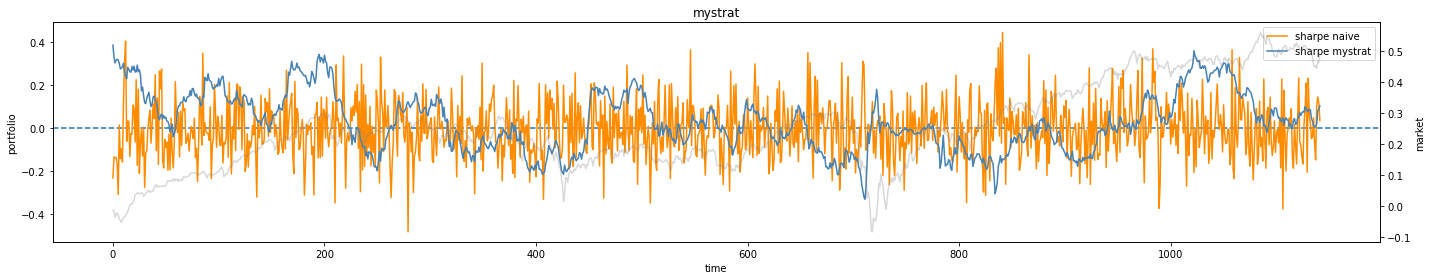

In [32]:
fig, ax1 = plt.subplots(figsize=(20, 4))
ax1.set_title("mystrat")
ax1.set_xlabel("time")
ax1.set_ylabel('portfolio')
# ax1.set_ylim(-1,1)
ax1.axhline(y=0, linestyle='--')

ax1.plot(naive[:,0], color='darkorange', label='sharpe naive')
ax1.plot(mystrat[:,0], color='steelblue', label='sharpe mystrat')
# ax1.plot(mystrat[:,1], color='green', label='mean mystrat', alpha=0.4)
# ax1.plot(mystrat[:,2], color='salmon', label='std mystrat')
ax1.legend()

ax2 = ax1.twinx()
# ax2.set_ylim(-1,1)
ax2.set_ylabel('market')
ax2.plot(np.cumsum(targets_day_means), color='grey', alpha=0.3)

fig.tight_layout()
plt.show()

In [8]:
# df = data.stock_prices_tabular
# df

# df_1301 = df[df.SecuritiesCode == 1301].set_index('Date')
# df_1301.index = df_1301.index.astype(int)
# df_1301.iloc[:20]

# fig, ax1 = plt.subplots(figsize=(20, 4))
# ax1.set_xlabel("time")
# ax1.set_ylabel('close')

# idx = list(range(min(df_1301.index),max(df_1301.index)+1))
# ax1.plot(df_1301.Close, color='steelblue', alpha=0.3)
# ax1.plot(df_1301.Close.reindex(idx), color='steelblue')

# ax2 = ax1.twinx()
# ax2.set_ylabel('std')
# ax2.plot(df_1301.Close_std_7, color='salmon', alpha=0.3)
# ax2.plot(df_1301.Close_std_7.reindex(idx), color='salmon')

# fig.tight_layout()
# plt.show()

In [9]:
# tn = data.stock_prices_series.cpu()
# unique_secus = np.unique(df.SecuritiesCode)

# sec_id = 1301
# col_close = 'Close'
# col_close_std_7 = 'Close_std_7'

# sec_index = np.argwhere(unique_secus==sec_id).item()
# close_index = np.argwhere(df.columns.to_numpy()==col_close).item()
# close_std_7_index = np.argwhere(df.columns.to_numpy()==col_close_std_7).item()

# close = tn[sec_index,close_index]
# close_std_7 = tn[sec_index,close_std_7_index]

In [10]:
# fig, ax1 = plt.subplots(figsize=(20, 4))
# ax1.set_xlabel("time")
# ax1.set_ylabel('close')

# ax1.plot(close, color='steelblue')

# ax2 = ax1.twinx()
# ax2.set_ylabel('std')
# ax2.plot(close_std_7, color='salmon')

# fig.tight_layout()
# plt.show()